# **Import all needed libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import data**

In [ ]:
# Get data and show first five rows
Data=pd.read_csv('/content/Occupancy_Estimation.csv')
Data.head(5)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


# **EDA**

In [ ]:
#Check the datatypes of each column
Data.dtypes

Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object

In [ ]:
#statistical summary of the data
Data.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [ ]:
# Check data (null or missing values)
Data.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

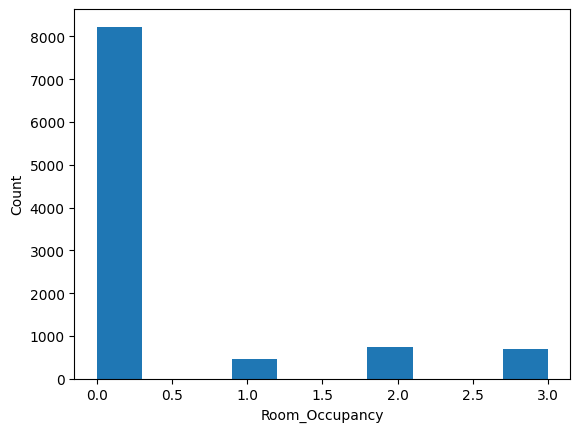

In [ ]:
# Show Room Occupancy Count distribution
plt.hist(Data['Room_Occupancy_Count'], bins=10)
plt.xlabel('Room_Occupancy')
plt.ylabel('Count')
plt.show()

In [ ]:
#Show Room Occupancy Count distribution in numbers
Count= Data['Room_Occupancy_Count'].value_counts()
print(Count)

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64


**As shown in the histogram figure and count above, one class (room occupancy count =0) significantly outnumbers the other classes (1,2,3) which means that we need to balance data by using oversampling or undersampling, etc.**

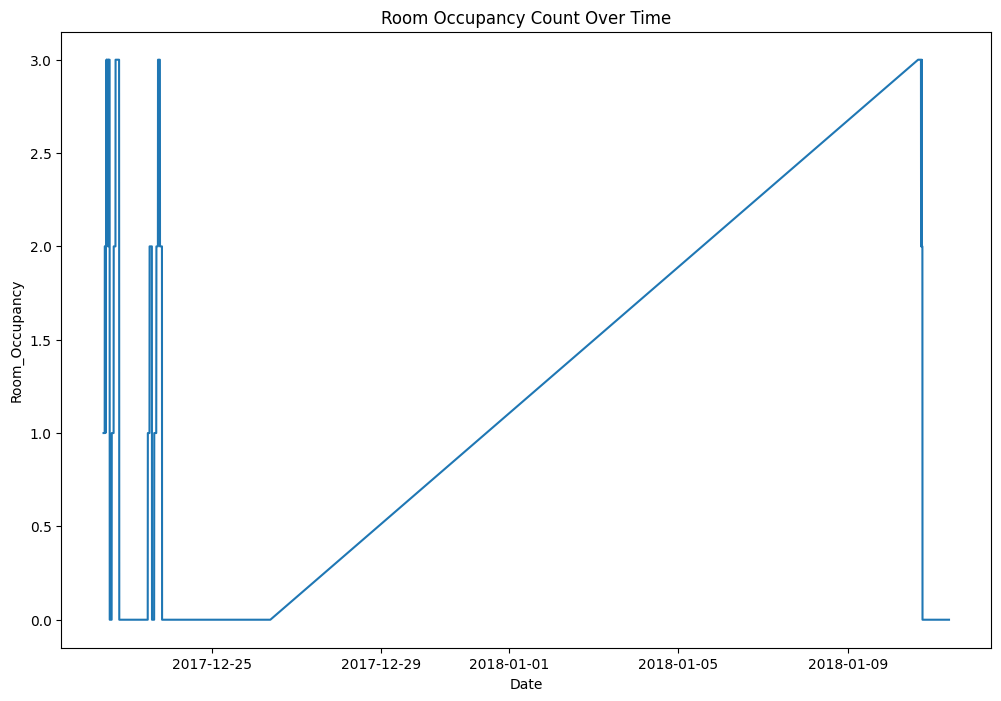

In [ ]:
# Show room occupancy over time
Data['Over_Date'] = pd.to_datetime(Data['Date'] + ' ' + Data['Time'])
plt.figure(figsize=(12, 8))
plt.plot(Data['Over_Date'], Data['Room_Occupancy_Count'])
plt.xlabel("Date")
plt.ylabel("Room_Occupancy")
plt.title("Room Occupancy Count Over Time")
plt.show()


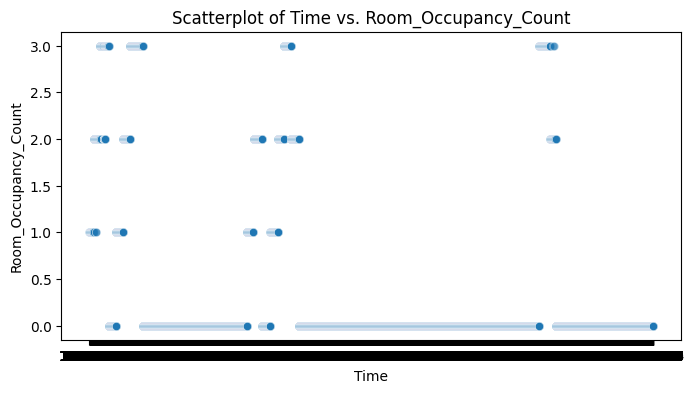

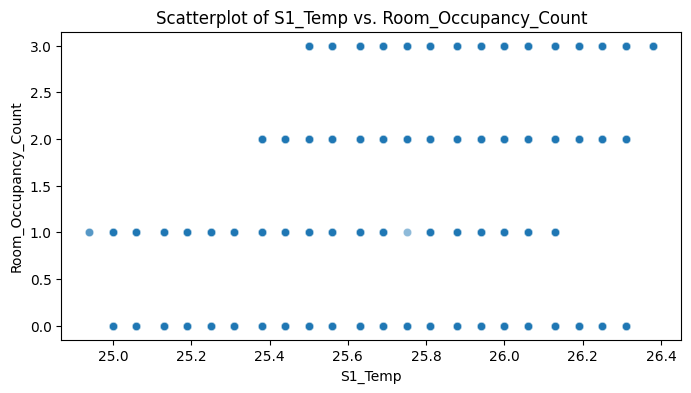

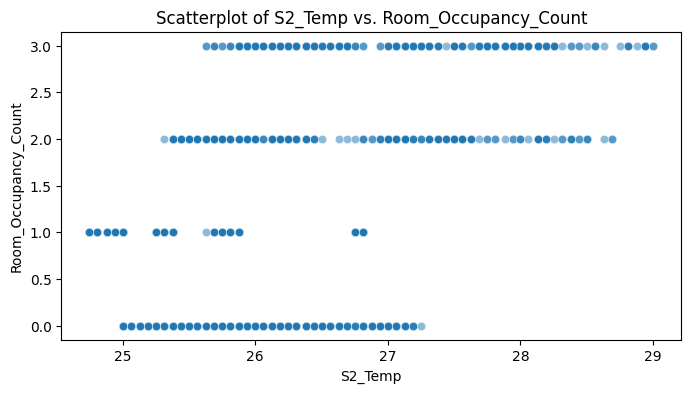

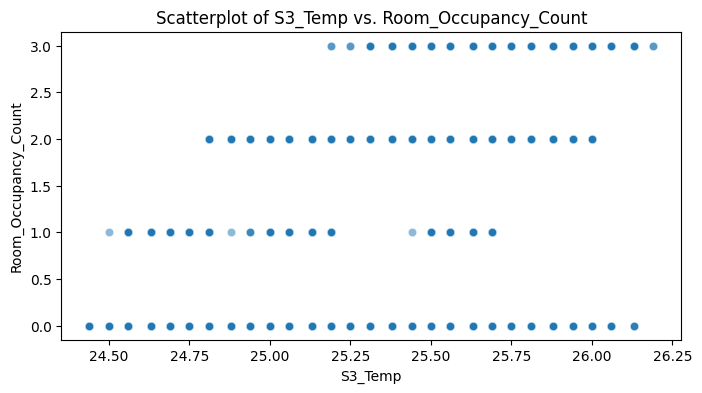

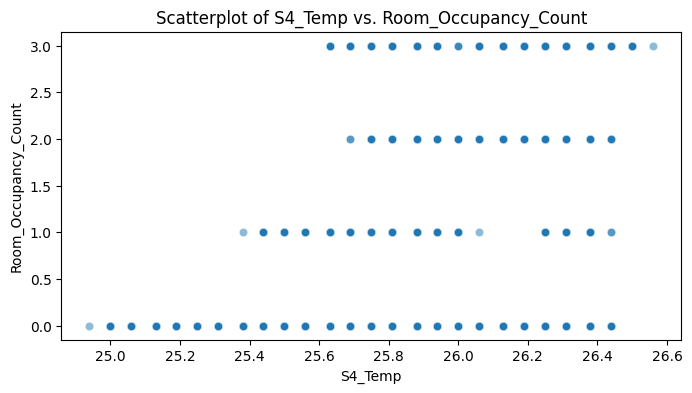

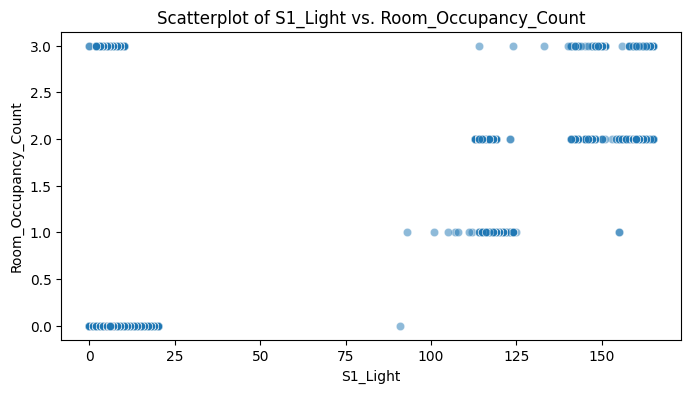

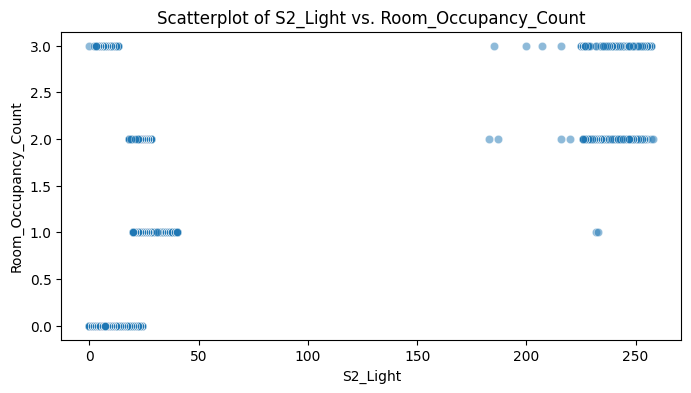

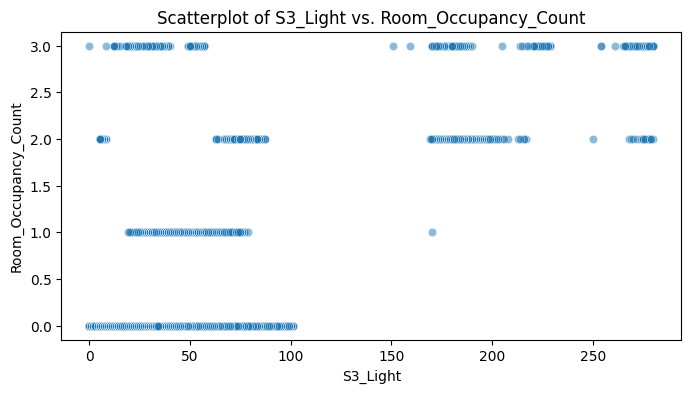

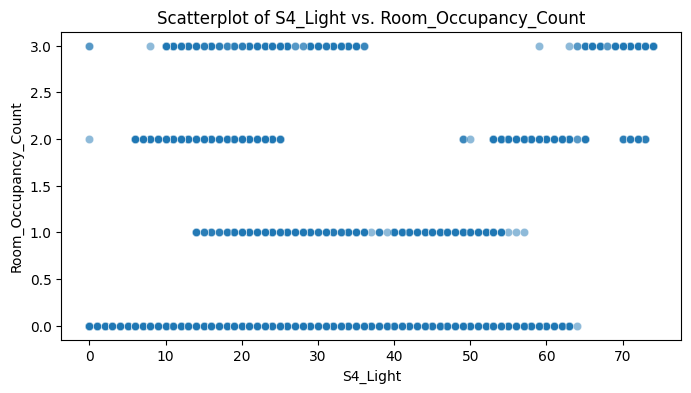

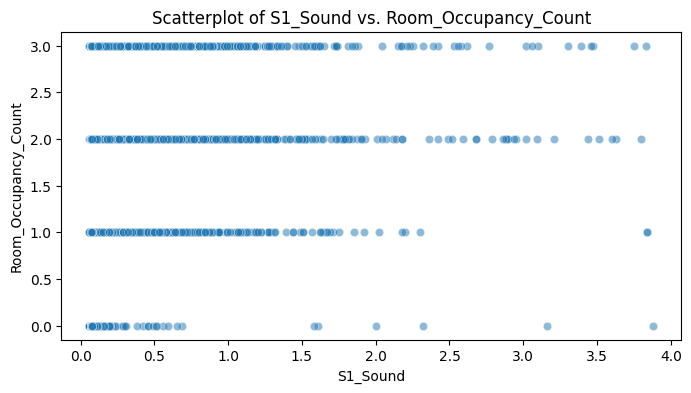

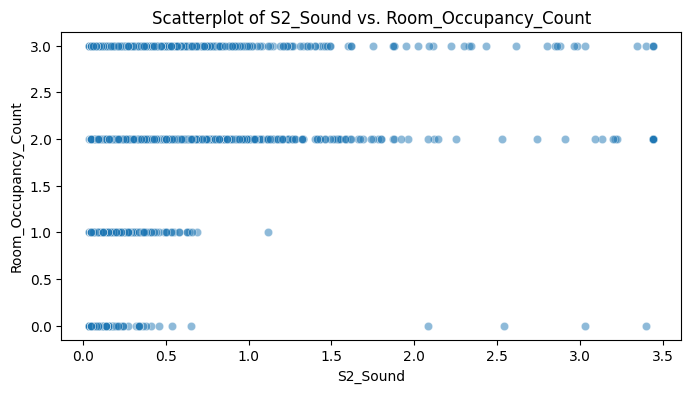

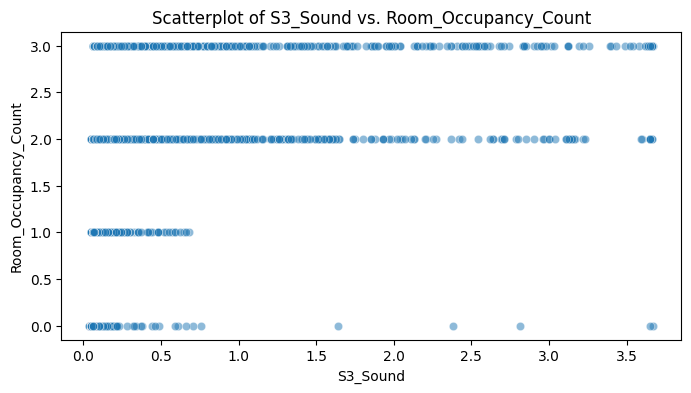

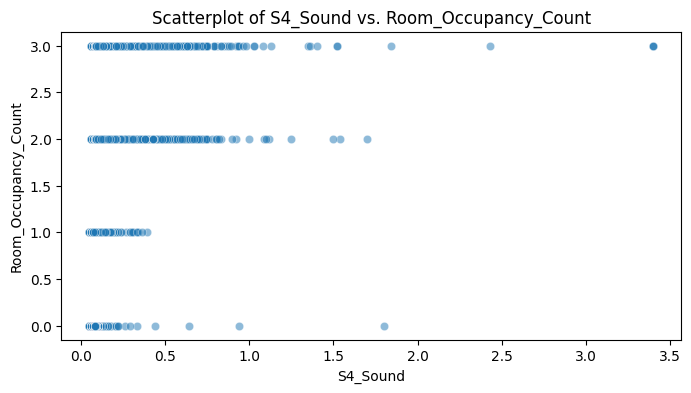

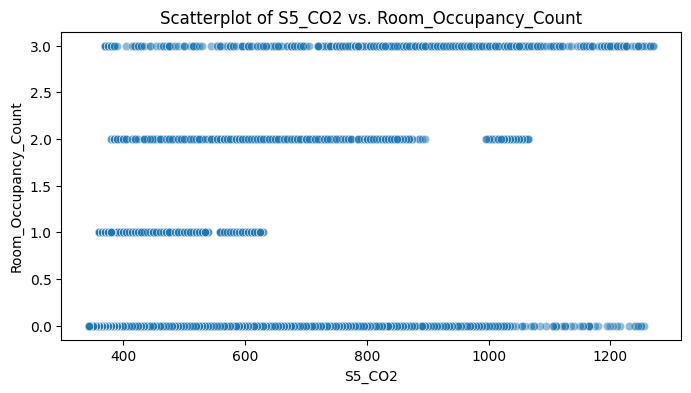

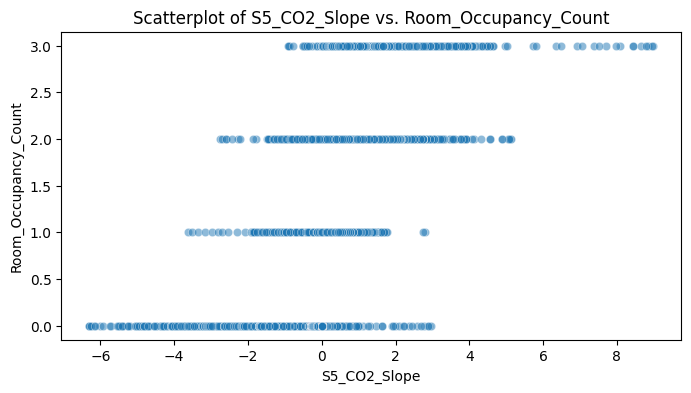

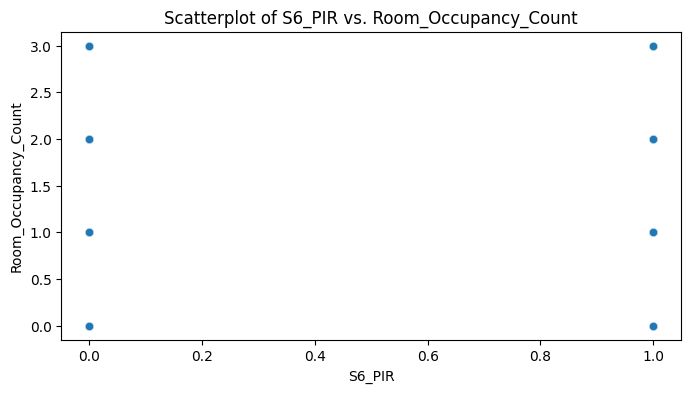

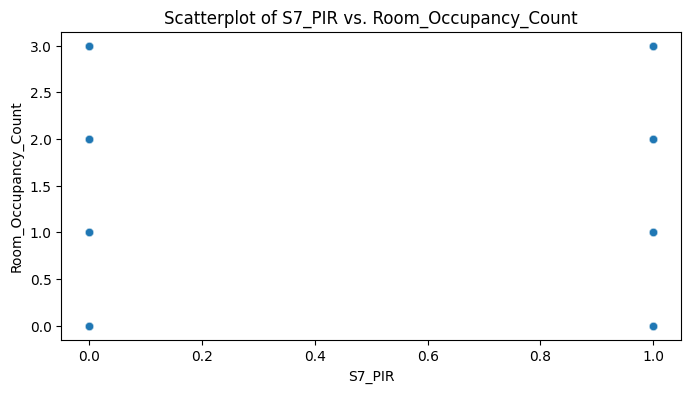

In [ ]:
# Analyze relationship between features and target variable
Features = Data.drop(['Date', 'Room_Occupancy_Count','Date_Time','Over_Date'], axis=1)
for feature in Features:
    if feature != 'Room_Occupancy_Count':  # Exclude the target variable itself
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=Data, x=feature, y=Data['Room_Occupancy_Count'], alpha=0.5)
        plt.title(f'Scatterplot of {feature} vs. Room_Occupancy_Count')
        plt.show()



**Temp with Room_Occupancy_Count :**


*   indicate horizontal striping, but i don't think that there is a clear relationship between them.
*   In my opinion, Temp sensors don't seem to have an important effect on predicting occupancy since the scatterplots indicate no obvious pattern.

Light with Room_Occupancy_Count :


*   Greater light measurements usually match with greater Room_Occupancy_Count. Specially in light S1 and S2
*   I think that they will have impact and effect the predicition.

Sound with Room_Occupancy_Count:


*  Fail to show an obvious pattern with occupancy count throughout the scatterplots.
*   In think that they could possess little effect on prediction.

C02 with Room_Occupancy_Count:


*   CO2 will have significant impact on prediction

PIR sensor:


*   Greater PIR measurements usually match with greater Room_Occupancy_Count. Specially in light S1 and S2
*   Expected to demonstrate a significant effect on predictions.



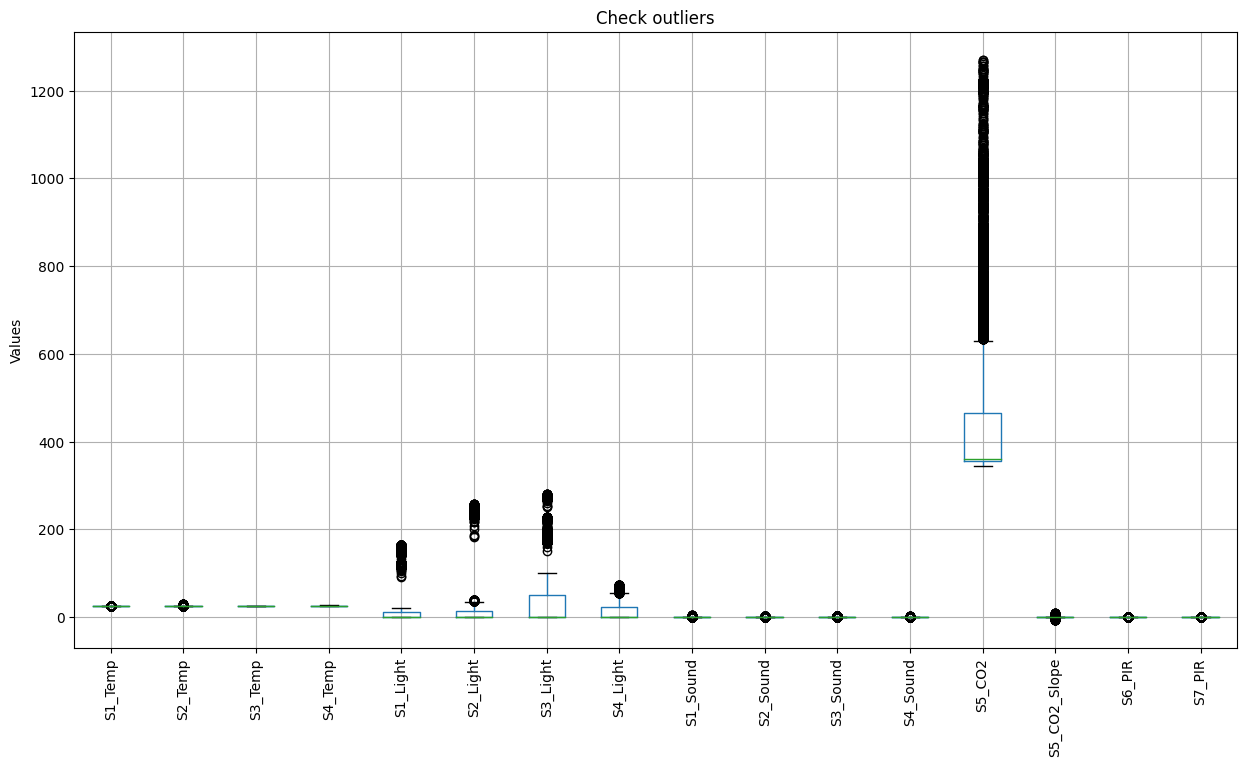

In [ ]:
# Check outliers
plt.figure(figsize=(15, 8))
Features.boxplot(rot=90)
plt.title('Check outliers')
plt.ylabel('Values')
plt.show()


**As shown in the boxplot , there are outliers but I will not remove them becuase outliers may conatins valuable inforamtion so i will keep them.**

In [ ]:
# Apply normalization between 0 and 1
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scale = MinMaxScaler()

# Select columns to normalize
column = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

# Apply the scaler to the DataFrame
Data[column] = scale.fit_transform(Data[column])

In [ ]:
#Confirm that features are normalized
Data.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,0.356953,0.187308,0.352355,0.502546,0.154212,0.100838,0.122316,0.178652,0.028319,0.023549,0.032540,0.016072,0.125254,0.411819,0.090137,0.079574,0.398559
std,0.243993,0.137959,0.244161,0.220021,0.309159,0.260869,0.208574,0.264895,0.082908,0.078383,0.113949,0.036025,0.216178,0.076258,0.286392,0.270645,0.893633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173611,0.103529,0.142857,0.308642,0.000000,0.000000,0.000000,0.000000,0.002618,0.002941,0.005510,0.002985,0.010811,0.409114,0.000000,0.000000,0.000000
50%,0.305556,0.148235,0.285714,0.500000,0.000000,0.000000,0.000000,0.000000,0.005236,0.002941,0.005510,0.008955,0.016216,0.412135,0.000000,0.000000,0.000000
75%,0.479167,0.207059,0.537143,0.654321,0.072727,0.054264,0.178571,0.297297,0.005236,0.005882,0.008264,0.014925,0.129730,0.412135,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
Data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,0.000000,0.000000,0.068571,0.271605,0.733333,0.131783,0.189286,0.540541,0.005236,0.044118,0.005510,0.002985,0.048649,0.462487,0.0,0.0,1
1,2017/12/22,10:50:12,0.000000,0.000000,0.068571,0.308642,0.733333,0.127907,0.189286,0.540541,0.227749,0.002941,0.005510,0.002985,0.048649,0.454431,0.0,0.0,1
2,2017/12/22,10:50:42,0.041667,0.000000,0.034286,0.308642,0.733333,0.131783,0.189286,0.540541,0.096859,0.020588,0.011019,0.002985,0.048649,0.446123,0.0,0.0,1
3,2017/12/22,10:51:13,0.041667,0.000000,0.068571,0.308642,0.733333,0.131783,0.189286,0.540541,0.091623,0.017647,0.016529,0.011940,0.048649,0.437563,0.0,0.0,1
4,2017/12/22,10:51:44,0.041667,0.000000,0.068571,0.308642,0.733333,0.131783,0.192857,0.540541,0.031414,0.005882,0.005510,0.002985,0.048649,0.428751,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,0.083333,0.089412,0.142857,0.228395,0.036364,0.027132,0.117857,0.297297,0.007853,0.000000,0.005510,0.008955,0.000000,0.412135,0.0,0.0,0
10125,2018/01/11,08:58:37,0.083333,0.072941,0.142857,0.191358,0.036364,0.027132,0.121429,0.297297,0.002618,0.002941,0.002755,0.008955,0.000000,0.412135,0.0,0.0,0
10126,2018/01/11,08:59:08,0.131944,0.072941,0.142857,0.191358,0.036364,0.027132,0.121429,0.297297,0.013089,0.002941,0.005510,0.008955,0.000000,0.412135,0.0,0.0,0
10127,2018/01/11,08:59:39,0.131944,0.072941,0.142857,0.191358,0.036364,0.027132,0.121429,0.297297,0.005236,0.011765,0.016529,0.008955,0.000000,0.412135,0.0,0.0,0


## **Feature Selection**

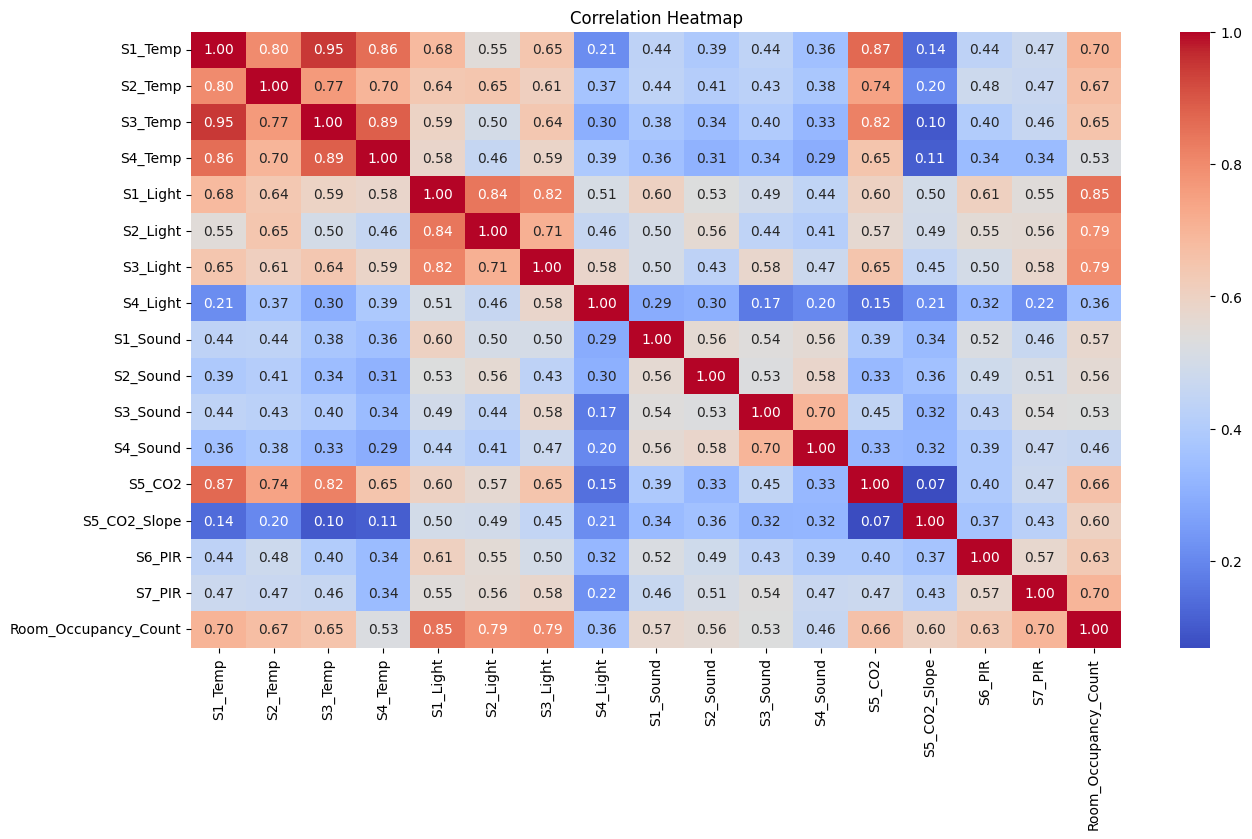

In [ ]:
# Show correlation between features by using heat map
correlation2 = Data.drop(['Date','Time'], axis=1)
correlation = correlation2.corr()
#print(correlation)
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Select features based on correlation between features and with target variable

#Threshold
high_corr_threshold = 0.8

Important_features = {}
Remove_features = set()

# Check correlation
for feature1, correlations in correlation.items():
    for feature2, corr_value in correlations.items():
        if feature1 != feature2:
            # If the correlation value is grater than the threshold, consider for removeee
            if corr_value >= high_corr_threshold:
                # Compare the correlation with the target variable and choose which feature to keep
                if correlation[feature1]['Room_Occupancy_Count'] > correlation[feature2]['Room_Occupancy_Count']:
                    Important_features[feature1] = correlation[feature1]['Room_Occupancy_Count']
                    if feature2 not in Important_features:
                        Remove_features.add(feature2)
                else:
                    Important_features[feature2] = correlation[feature2]['Room_Occupancy_Count']
                    if feature1 not in Important_features:
                        Remove_features.add(feature1)


print("Features to keep:", Important_features.keys())
print("Features to remove:", Remove_features)


Features to keep: dict_keys(['S1_Temp', 'S3_Temp', 'S5_CO2', 'S1_Light', 'Room_Occupancy_Count'])
Features to remove: {'S3_Light', 'S3_Temp', 'S4_Temp', 'S2_Light', 'S5_CO2'}


In [ ]:
New_data = Data.drop(['Date', 'S4_Temp','S3_Temp','S2_Light','S5_CO2','S3_Light'], axis=1)
New_data.head(3)

,Time,S1_Temp,S2_Temp,S1_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,10:49:41,0.000000,0.0,0.733333,0.540541,0.005236,0.044118,0.005510,0.002985,0.462487,0.0,0.0,1
1,10:50:12,0.000000,0.0,0.733333,0.540541,0.227749,0.002941,0.005510,0.002985,0.454431,0.0,0.0,1
2,10:50:42,0.041667,0.0,0.733333,0.540541,0.096859,0.020588,0.011019,0.002985,0.446123,0.0,0.0,1


## **Split into X and Y**

In [ ]:
# Define X and y (With feature selection)
X = New_data.drop(['Time','Room_Occupancy_Count'], axis=1)
y = New_data['Room_Occupancy_Count']

# Define training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X train size:",X_train.shape)
print("X test size:",X_test.shape)
print("Y train size:",y_train.shape)
print("Y test size:",y_test.shape)



X train size: (7090, 11)
X test size: (3039, 11)
Y train size: (7090,)
Y test size: (3039,)


## **Handle imbalanced data**

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=24)
# Fit smote
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: 0    5777
2     504
3     498
1     311
Name: Room_Occupancy_Count, dtype: int64
After SMOTE: 0    5777
3    5777
1    5777
2    5777
Name: Room_Occupancy_Count, dtype: int64


# **Random Forest Model**

## **With default Parameters**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [ ]:
#Train the model for feature selection data
rf_model.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [ ]:
y_pred=rf_model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn import metrics
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate and print F1 score with 'macro' averaging for multi-class
f1 = f1_score(y_test, y_pred, average='macro')
print("F1 Score: {:.2f}".format(f1))

# Calculate and print recall with 'macro' averaging for multi-class
recall = recall_score(y_test, y_pred, average='macro')
print("Recall: {:.2f}".format(recall))

# Calculate and print precision with 'macro' averaging for multi-class
precision = precision_score(y_test, y_pred, average='macro')
print("Precision: {:.2f}".format(precision))

Accuracy: 99.67%
F1 Score: 0.99
Recall: 0.99
Precision: 0.99


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2451,    0,    0,    0],
       [   0,  145,    3,    0],
       [   0,    0,  239,    5],
       [   0,    0,    2,  194]])

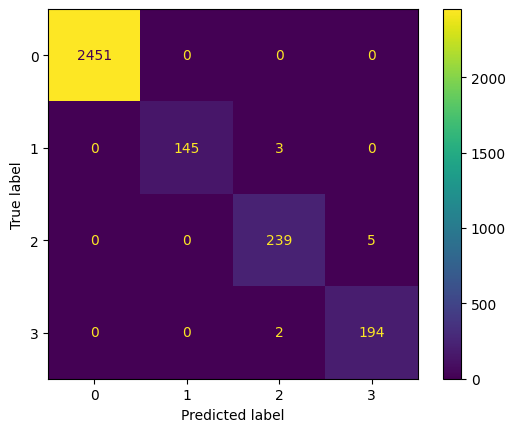

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
#show feature importance

importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))


print(X.columns)

Feature: 0, Score: 0.15636
Feature: 1, Score: 0.08905
Feature: 2, Score: 0.29141
Feature: 3, Score: 0.15858
Feature: 4, Score: 0.07844
Feature: 5, Score: 0.05291
Feature: 6, Score: 0.05716
Feature: 7, Score: 0.01310
Feature: 8, Score: 0.07253
Feature: 9, Score: 0.00223
Feature: 10, Score: 0.02822
Index(['S1_Temp', 'S2_Temp', 'S1_Light', 'S4_Light', 'S1_Sound', 'S2_Sound',
       'S3_Sound', 'S4_Sound', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')


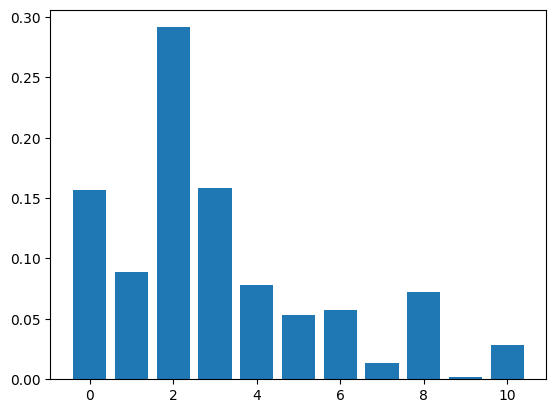

In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## **Grid Search**

In [ ]:
# Assuming 'rf_model' is your RandomForestClassifier instance
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 4, 6]
}

In [ ]:
# Create a Random Forest classifier
rf_model_gs = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid=GridSearchCV(estimator=rf_model_gs,param_grid=param_grid,cv= 5, verbose=2, n_jobs=-1)

In [ ]:
# Fit the GridSearchCV object to the training data
rf_Grid.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
cv_results = rf_Grid.cv_results_
best_index = rf_Grid.best_index_

print("Cross-validation scores for each fold with the best parameter combination:")
for i in range(rf_Grid.cv):
    key = f'split{i}_test_score'
    print(f"Fold {i+1}: {cv_results[key][best_index]}")

# Print the best parameters and the best score
print(f"Best parameters: {rf_Grid.best_params_}")
print(f"Best score: {rf_Grid.best_score_}")

Cross-validation scores for each fold with the best parameter combination:
Fold 1: 0.9987018606663782
Fold 2: 1.0
Fold 3: 0.9993509303331891
Fold 4: 0.9989179831205367
Fold 5: 0.999350789872322
Best parameters: {'max_depth': 20, 'min_samples_split': 4, 'n_estimators': 100}
Best score: 0.9992643127984853


In [ ]:
#Check Accuracy
print(f'Train Accuracy -:{rf_Grid.score(X_train_smote,y_train_smote):.3f}')
print(f'Train Accuracy -:{rf_Grid.score(X_test,y_test):.3f}')

Train Accuracy -:1.000
Train Accuracy -:0.997


In [ ]:
#Define best parameters
best_params = {
    'max_depth': 20,#30
    'n_estimators': 100, #150
    'min_samples_split': 4 #5,
}

In [ ]:
#Build random forest model
best_rf = RandomForestClassifier(**best_params)

In [ ]:
# Fit the model on the training data
best_rf.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=20, min_samples_split=4)

In [ ]:
# Make predictions on the test set
y_pred2 = best_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate and print F1 score with 'macro' averaging for multi-class
f1 = f1_score(y_test, y_pred2, average='macro')
print("F1 Score: {:.2f}".format(f1))

# Calculate and print recall with 'macro' averaging for multi-class
recall = recall_score(y_test, y_pred2, average='macro')
print("Recall: {:.2f}".format(recall))

# Calculate and print precision with 'macro' averaging for multi-class
precision = precision_score(y_test, y_pred2, average='macro')
print("Precision: {:.2f}".format(precision))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 99.70%
F1 Score: 0.99
Recall: 0.99
Precision: 0.99
Confusion Matrix:
[[2451    0    0    0]
 [   0  146    2    0]
 [   0    0  239    5]
 [   0    0    2  194]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2451
           1       1.00      0.99      0.99       148
           2       0.98      0.98      0.98       244
           3       0.97      0.99      0.98       196

    accuracy                           1.00      3039
   macro avg       0.99      0.99      0.99      3039
weighted avg       1.00      1.00      1.00      3039



In [ ]:
#show feature importance
# get importance
importance_rf = best_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance_rf):
 print('Feature: %0d, Score: %.5f' % (i,v))


print(X.columns)

Feature: 0, Score: 0.15733
Feature: 1, Score: 0.09467
Feature: 2, Score: 0.29591
Feature: 3, Score: 0.14940
Feature: 4, Score: 0.06623
Feature: 5, Score: 0.07063
Feature: 6, Score: 0.04837
Feature: 7, Score: 0.01531
Feature: 8, Score: 0.07818
Feature: 9, Score: 0.00154
Feature: 10, Score: 0.02244
Index(['S1_Temp', 'S2_Temp', 'S1_Light', 'S4_Light', 'S1_Sound', 'S2_Sound',
       'S3_Sound', 'S4_Sound', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')


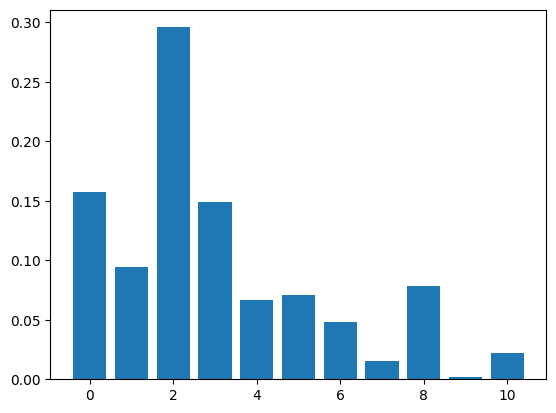

In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance_rf))], importance_rf)
plt.show()

Random forest with grid search and cross validation has better performance than Random forest with default parameters.

# **Gradient Boost**

## **With default Parameters**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()

In [ ]:
gb_model.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier()

In [ ]:
y_pred_gb= gb_model.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_gb)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate and print F1 score with 'macro' averaging for multi-class
f1 = f1_score(y_test, y_pred_gb, average='macro')
print("F1 Score: {:.2f}".format(f1))

# Calculate and print recall with 'macro' averaging for multi-class
recall = recall_score(y_test, y_pred_gb, average='macro')
print("Recall: {:.2f}".format(recall))

# Calculate and print precision with 'macro' averaging for multi-class
precision = precision_score(y_test, y_pred_gb, average='macro')
print("Precision: {:.2f}".format(precision))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 99.51%
F1 Score: 0.98
Recall: 0.98
Precision: 0.98
Confusion Matrix:
[[2451    0    0    0]
 [   0  145    3    0]
 [   0    1  235    8]
 [   1    0    2  193]]


## **With grid search and Cross validation**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [ ]:
Grid_gb = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
Grid_gb.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [ ]:
cv_results = Grid_gb.cv_results_
best_index = Grid_gb.best_index_

print("Cross-validation scores for each fold with the best parameter combination:")
for i in range(Grid_gb.cv):
    key = f'split{i}_test_score'
    print(f"Fold {i+1}: {cv_results[key][best_index]}")

# Print the best parameters and the best score
print(f"Best parameters: {Grid_gb.best_params_}")
print(f"Best score: {Grid_gb.best_score_}")

Cross-validation scores for each fold with the best parameter combination:
Fold 1: 0.9974037213327563
Fold 2: 1.0
Fold 3: 0.9991345737775854
Fold 4: 0.9997835966241073
Fold 5: 0.998701579744644
Best parameters: {'learning_rate': 0.1, 'n_estimators': 300}
Best score: 0.9990046942958186


In [ ]:
#Check Accuracy
print(f'Train Accuracy -:{Grid_gb.score(X_train_smote,y_train_smote):.3f}')
print(f'Train Accuracy -:{Grid_gb.score(X_test,y_test):.3f}')

Train Accuracy -:1.000
Train Accuracy -:0.996


In [ ]:
#Define best parameters
best_params = {
    'learning_rate': 0.1,
    'n_estimators': 300, #150
}

In [ ]:
best_gb = GradientBoostingClassifier(**best_params)

In [ ]:
# Fit the model on the training data
best_gb.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier(n_estimators=300)

In [ ]:
# Make predictions on the test set
y_pred3 = best_gb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred3)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate and print F1 score with 'macro' averaging for multi-class
f1 = f1_score(y_test, y_pred3, average='macro')
print("F1 Score: {:.2f}".format(f1))

# Calculate and print recall with 'macro' averaging for multi-class
recall = recall_score(y_test, y_pred3, average='macro')
print("Recall: {:.2f}".format(recall))

# Calculate and print precision with 'macro' averaging for multi-class
precision = precision_score(y_test, y_pred3, average='macro')
print("Precision: {:.2f}".format(precision))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 99.67%
F1 Score: 0.99
Recall: 0.99
Precision: 0.99
Confusion Matrix:
[[2451    0    0    0]
 [   0  145    3    0]
 [   0    0  241    3]
 [   1    0    3  192]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2451
           1       1.00      0.98      0.99       148
           2       0.98      0.99      0.98       244
           3       0.98      0.98      0.98       196

    accuracy                           1.00      3039
   macro avg       0.99      0.99      0.99      3039
weighted avg       1.00      1.00      1.00      3039



**The performace of gradient boost is better with cross validation and grid search**

# **XGBoost Model**

## **Default Parameter**

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [ ]:
# Train the model on the training data
xgb_model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate and print F1 score with 'macro' averaging for multi-class
f1 = f1_score(y_test, y_pred_xgb, average='macro')
print("F1 Score: {:.2f}".format(f1))

# Calculate and print recall with 'macro' averaging for multi-class
recall = recall_score(y_test, y_pred_xgb, average='macro')
print("Recall: {:.2f}".format(recall))

# Calculate and print precision with 'macro' averaging for multi-class
precision = precision_score(y_test, y_pred_xgb, average='macro')
print("Precision: {:.2f}".format(precision))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 99.54%
F1 Score: 0.98
Recall: 0.98
Precision: 0.98
Confusion Matrix:
[[2451    0    0    0]
 [   0  144    4    0]
 [   0    0  237    7]
 [   0    0    3  193]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2451
           1       1.00      0.97      0.99       148
           2       0.97      0.97      0.97       244
           3       0.96      0.98      0.97       196

    accuracy                           1.00      3039
   macro avg       0.98      0.98      0.98      3039
weighted avg       1.00      1.00      1.00      3039



## **With Cross validation and Grid search**

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

In [ ]:
Grid_xgb = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)

In [ ]:
Grid_xgb.fit(X_train_smote,y_train_smote)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     objective='multi:softprob', ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]})

In [ ]:
cv_results = Grid_xgb.cv_results_
best_index = Grid_xgb.best_index_

print("Cross-validation scores for each fold with the best parameter combination:")
for i in range(Grid_xgb.cv):
    key = f'split{i}_test_score'
    print(f"Fold {i+1}: {cv_results[key][best_index]}")

# Print the best parameters and the best score
print(f"Best parameters: {Grid_xgb.best_params_}")
print(f"Best score: {Grid_xgb.best_score_}")

Cross-validation scores for each fold with the best parameter combination:
Fold 1: 0.9987018606663782
Fold 2: 0.9997836434443964
Fold 3: 0.9995672868887927
Fold 4: 0.9997835966241073
Fold 5: 0.9989179831205367
Best parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 300}
Best score: 0.9993508741488423


In [ ]:
#Check Accuracy
print(f'Train Accuracy -:{Grid_xgb.score(X_train_smote,y_train_smote):.3f}')
print(f'Train Accuracy -:{Grid_xgb.score(X_test,y_test):.3f}')

Train Accuracy -:1.000
Train Accuracy -:0.996


In [ ]:
#Define best parameters
best_params = {
    'learning_rate': 0.2,
    'n_estimators': 300, #150
    'max_depth': 4
}

In [ ]:
best_xgb= xgb.XGBClassifier(**best_params)

In [ ]:
# Fit the model on the training data
best_xgb.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make predictions on the test set
y_pred4 = best_xgb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred4)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate and print F1 score with 'macro' averaging for multi-class
f1 = f1_score(y_test, y_pred4, average='macro')
print("F1 Score: {:.2f}".format(f1))

# Calculate and print recall with 'macro' averaging for multi-class
recall = recall_score(y_test, y_pred4, average='macro')
print("Recall: {:.2f}".format(recall))

# Calculate and print precision with 'macro' averaging for multi-class
precision = precision_score(y_test, y_pred4, average='macro')
print("Precision: {:.2f}".format(precision))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred4)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 99.61%
F1 Score: 0.99
Recall: 0.98
Precision: 0.99
Confusion Matrix:
[[2451    0    0    0]
 [   0  144    4    0]
 [   0    0  239    5]
 [   2    0    1  193]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2451
           1       1.00      0.97      0.99       148
           2       0.98      0.98      0.98       244
           3       0.97      0.98      0.98       196

    accuracy                           1.00      3039
   macro avg       0.99      0.98      0.99      3039
weighted avg       1.00      1.00      1.00      3039



XGBoost with grid search and cross validation is better than default parameters

# **SVC**

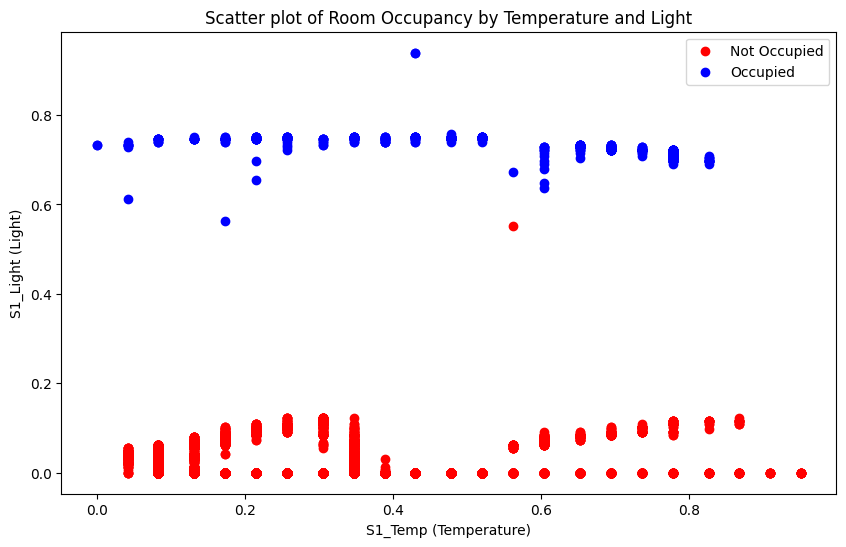

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the color for each occupancy count level, assuming it's binary for simplicity
colors = {0: 'red', 1: 'blue'}

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(New_data[New_data['Room_Occupancy_Count'] == 0]['S1_Temp'], New_data[New_data['Room_Occupancy_Count'] == 0]['S1_Light'], c='red', label='Not Occupied')
plt.scatter(New_data[New_data['Room_Occupancy_Count'] == 1]['S1_Temp'], New_data[New_data['Room_Occupancy_Count'] == 1]['S1_Light'], c='blue', label='Occupied')

plt.xlabel('S1_Temp (Temperature)')
plt.ylabel('S1_Light (Light)')
plt.legend(loc='best')
plt.title('Scatter plot of Room Occupancy by Temperature and Light')
plt.show()


## **Default parameters**

In [ ]:
from sklearn.svm import SVC
# Linear SVM with default parameters
svm_model= SVC()
svm_model.fit(X_train_smote,y_train_smote)

SVC()

In [ ]:
y_pred_svc = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_svc)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate and print F1 score with 'macro' averaging for multi-class
f1 = f1_score(y_test, y_pred_svc, average='macro')
print("F1 Score: {:.2f}".format(f1))

# Calculate and print recall with 'macro' averaging for multi-class
recall = recall_score(y_test, y_pred_svc, average='macro')
print("Recall: {:.2f}".format(recall))

# Calculate and print precision with 'macro' averaging for multi-class
precision = precision_score(y_test, y_pred_svc, average='macro')
print("Precision: {:.2f}".format(precision))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 99.14%
F1 Score: 0.97
Recall: 0.98
Precision: 0.97
Confusion Matrix:
[[2443    0    0    8]
 [   0  147    1    0]
 [   0    2  235    7]
 [   2    0    6  188]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2451
           1       0.99      0.99      0.99       148
           2       0.97      0.96      0.97       244
           3       0.93      0.96      0.94       196

    accuracy                           0.99      3039
   macro avg       0.97      0.98      0.97      3039
weighted avg       0.99      0.99      0.99      3039



## **With Grid search and cross validation**

In [ ]:
# Grid search to find the best parameters
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['linear', 'poly', 'rbf']}


In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search_svm = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid_search_svm.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=2)

In [ ]:
cv_results = grid_search_svm.cv_results_
best_index = grid_search_svm.best_index_

print("Cross-validation scores for each fold with the best parameter combination:")
for i in range(grid_search_svm.cv):
    key = f'split{i}_test_score'
    print(f"Fold {i+1}: {cv_results[key][best_index]}")

# Print the best parameters and the best score
print(f"Best parameters: {grid_search_svm.best_params_}")
print(f"Best score: {grid_search_svm.best_score_}")

Cross-validation scores for each fold with the best parameter combination:
Fold 1: 0.9922425952045134
Fold 2: 0.9936530324400564
Fold 3: 0.9901269393511989
Fold 4: 0.9943582510578279
Fold 5: 0.9901269393511989
Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Best score: 0.9921015514809591


In [ ]:
#Check Accuracy
print(f'Train Accuracy -:{grid_search_svm.score(X_train_smote,y_train_smote):.3f}')
print(f'Train Accuracy -:{grid_search_svm.score(X_test,y_test):.3f}')

Train Accuracy -:0.990
Train Accuracy -:0.992


In [ ]:
best_params = {
    'C': 10,
    'gamma': 1, #150
    'kernel': 'poly'
}

In [ ]:
best_svc= SVC(**best_params)

In [ ]:
best_svc.fit(X_train_smote,y_train_smote)

SVC(C=10, gamma=1, kernel='poly')

In [ ]:
# Make predictions on the test set
y_pred5 = best_svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred5)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate and print F1 score with 'macro' averaging for multi-class
f1 = f1_score(y_test, y_pred5, average='macro')
print("F1 Score: {:.2f}".format(f1))

# Calculate and print recall with 'macro' averaging for multi-class
recall = recall_score(y_test, y_pred5, average='macro')
print("Recall: {:.2f}".format(recall))

# Calculate and print precision with 'macro' averaging for multi-class
precision = precision_score(y_test, y_pred5, average='macro')
print("Precision: {:.2f}".format(precision))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred5)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 98.91%
F1 Score: 0.96
Recall: 0.96
Precision: 0.97
Confusion Matrix:
[[2449    0    0    2]
 [   0  141    4    3]
 [   0    5  234    5]
 [   6    0    8  182]]


# **Best Model to use**

## **The random forest with grid search and cross validation has the best performance with:**

**Accuracy: 99.70%**

**F1 Score: 0.99**

**Recall: 0.99**

**Precision: 0.99**


